In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Memanggil Dataset

In [2]:
df = pd.read_csv('mobilbekas.csv')

# Deskripsi Dataset

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4999 non-null   object 
 1   year          4999 non-null   int64  
 2   price         4999 non-null   int64  
 3   transmission  4999 non-null   object 
 4   mileage       4999 non-null   int64  
 5   fuelType      4999 non-null   object 
 6   tax           4999 non-null   int64  
 7   mpg           4999 non-null   float64
 8   engineSize    4999 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 351.6+ KB


<Axes: >

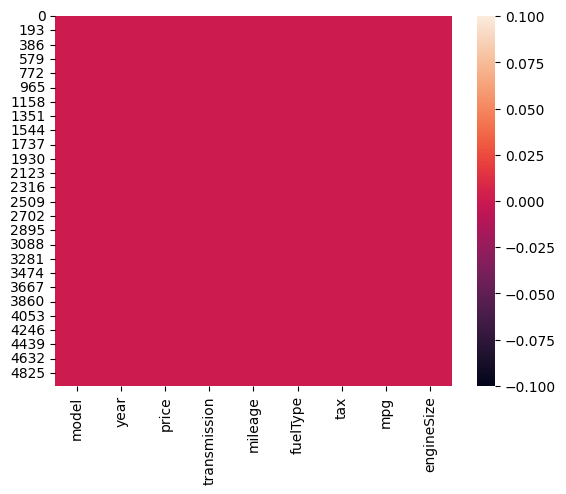

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2016.993799,17353.888978,23455.987798,118.892779,55.617964,1.770174
std,1.901054,9077.650932,18850.446493,62.764760,17.396318,0.583857
min,2001.000000,899.000000,4.000000,0.000000,1.100000,0.000000
25%,2016.000000,11260.000000,8910.000000,125.000000,47.900000,1.400000
50%,2017.000000,15498.000000,19218.000000,145.000000,55.400000,1.800000
75%,2019.000000,20995.000000,33188.500000,145.000000,61.700000,2.000000
max,2020.000000,84898.000000,140000.000000,570.000000,470.800000,5.000000


# Mendeteksi Outlier

In [7]:
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

year              3.0
price          9735.0
mileage       24278.5
tax              20.0
mpg              13.8
engineSize        0.6
dtype: float64

In [8]:
outlier_filter = (df.select_dtypes(exclude=['object']) < q1 - 1.5 * iqr) | (df.select_dtypes(exclude=['object']) > q3 + 1.5 * iqr)
outlier_filter

,year,price,mileage,tax,mpg,engineSize
0,False,False,False,False,False,False
1,False,False,False,True,False,False
2,False,False,False,True,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
4994,False,False,False,False,False,False
4995,False,False,False,False,False,False
4996,False,False,False,False,False,False
4997,False,False,False,False,False,False


In [9]:
for col in outlier_filter.columns :
    if df[col].dtype != object :
        print('Nama Kolom:',col)
        print(outlier_filter[col].value_counts())
        print('-------------------')

Nama Kolom: year
year
False    4968
True       31
Name: count, dtype: int64
-------------------
Nama Kolom: price
price
False    4793
True      206
Name: count, dtype: int64
-------------------
Nama Kolom: mileage
mileage
False    4867
True      132
Name: count, dtype: int64
-------------------
Nama Kolom: tax
tax
False    3423
True     1576
Name: count, dtype: int64
-------------------
Nama Kolom: mpg
mpg
False    4889
True      110
Name: count, dtype: int64
-------------------
Nama Kolom: engineSize
engineSize
False    4571
True      428
Name: count, dtype: int64
-------------------


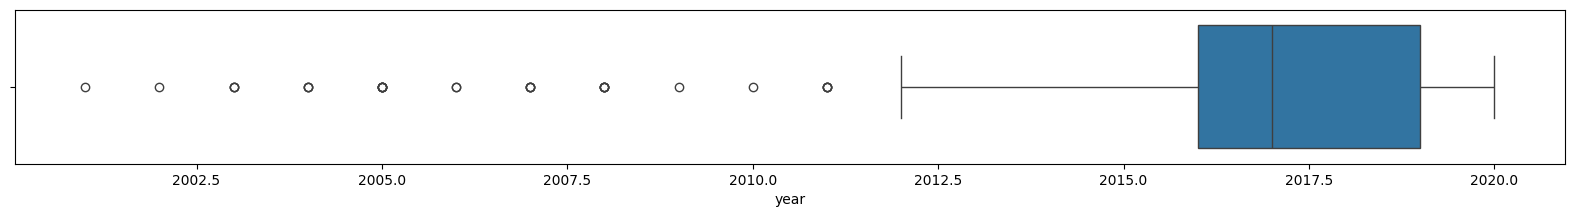

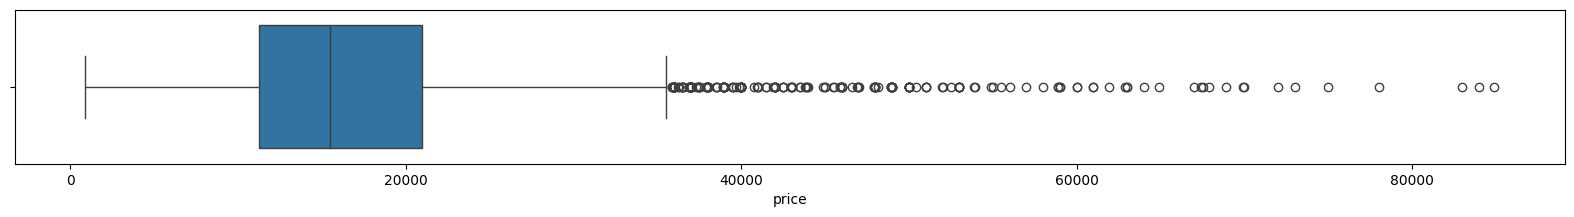

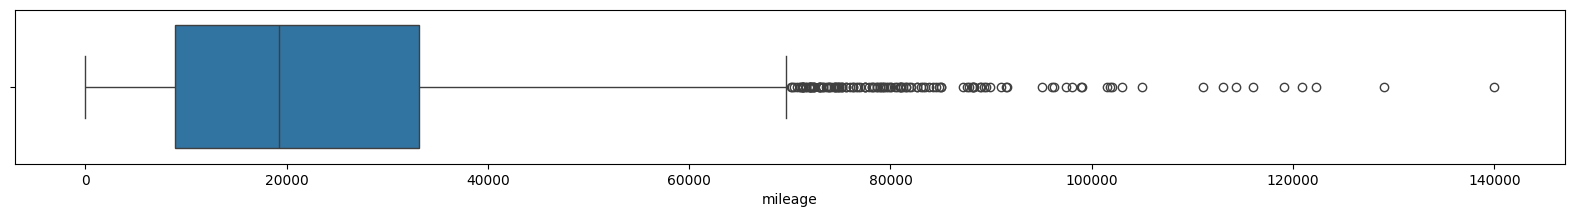

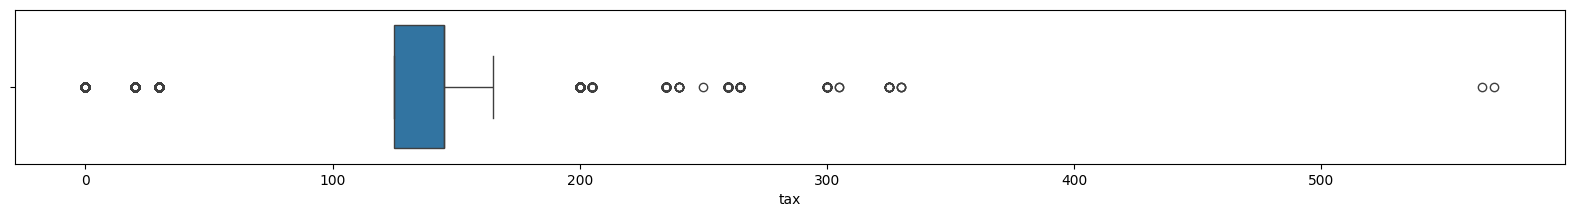

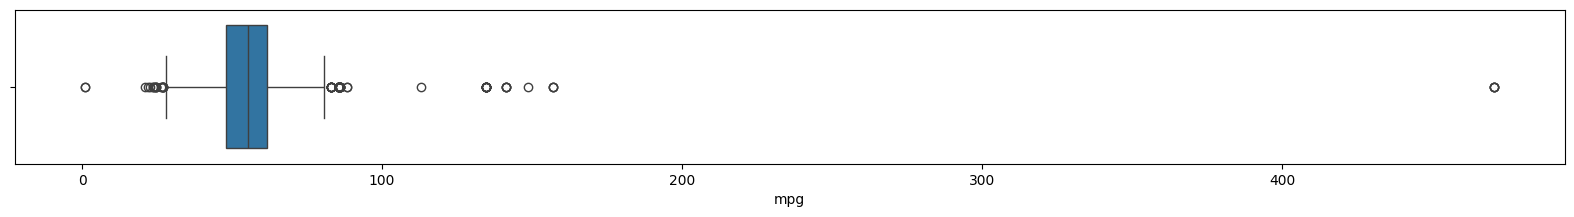

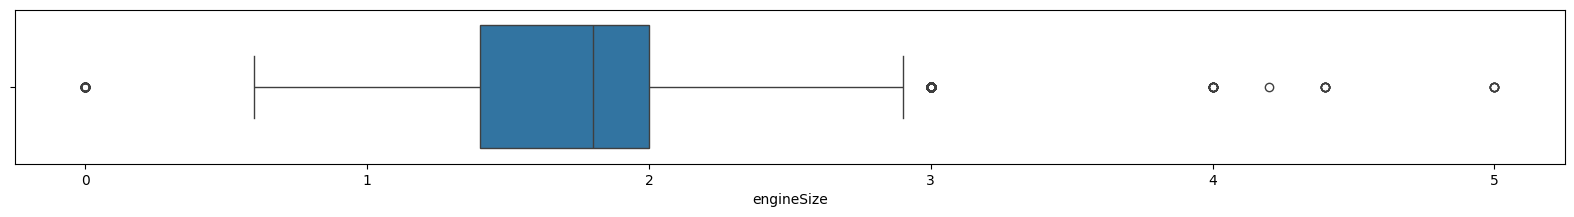

In [10]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

# Mengecek Missing Values

In [11]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# Visualisasi Data

<Axes: >

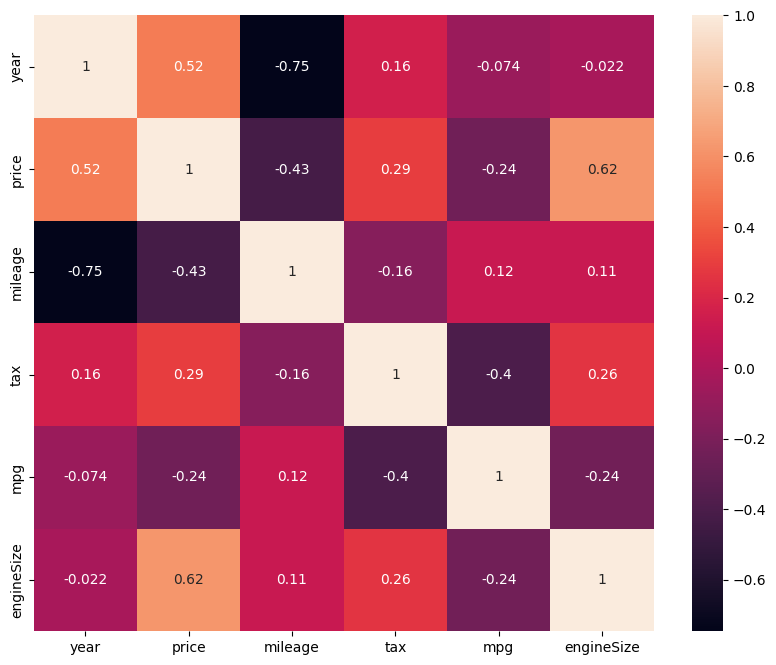

In [12]:
df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Mobil Berdasarkan Model

In [13]:
df = pd.read_csv('mobilbekas.csv')

In [14]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56],
 [Text(0, 0, ' Q8'),
  Text(1, 0, ' KA'),
  Text(2, 0, ' 8 Series'),
  Text(3, 0, ' X6'),
  Text(4, 0, ' i3'),
  Text(5, 0, ' S-MAX'),
  Text(6, 0, ' 6 Series'),
  Text(7, 0, ' X7'),
  Text(8, 0, ' Mustang'),
  Text(9, 0, ' A7'),
  Text(10, 0, ' Mondeo'),
  Text(11, 0, ' M4'),
  Text(12, 0, ' TT'),
  Text(13, 0, ' 7 Series'),
  Text(14, 0, ' X2'),
  Text(15, 0, ' A8'),
  Text(16, 0, ' B-MAX'),
  Text(17, 0, ' Edge'),
  Text(18, 0, ' X4'),
  Text(19, 0, ' I800'),
  Text(20, 0, ' Q7'),
  Text(21, 0, ' Ka+'),
  Text(22, 0, ' I40'),
  Text(23, 0, ' IX20'),
  Text(24, 0, ' Santa Fe'),
  Text(25, 0, ' IX35'),
  Text(26, 0, ' C-MAX'),
  Text(27, 0, ' X5'),
  Text(28

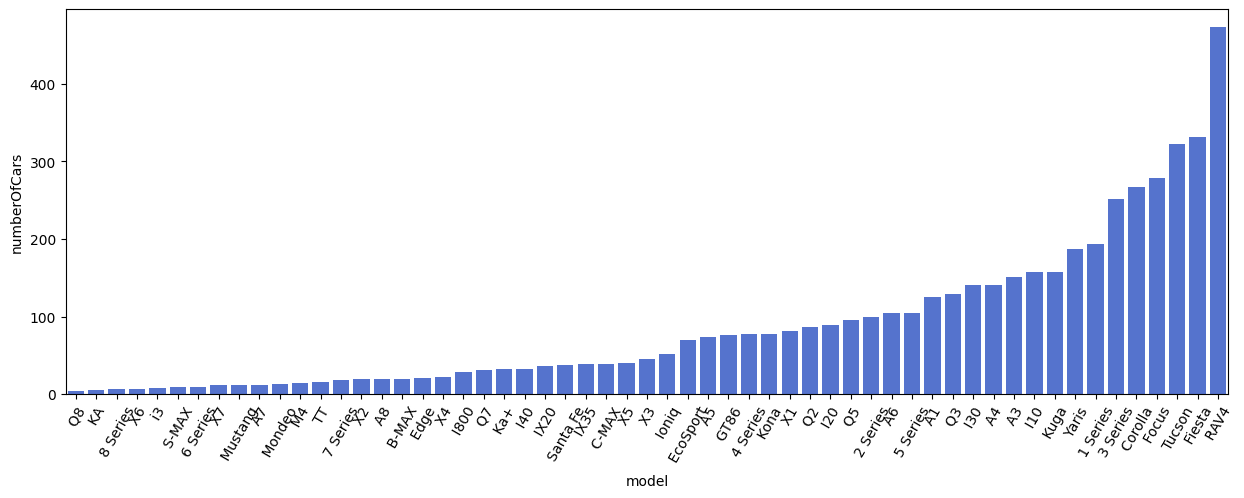

In [15]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

# Ukuran Mesin

In [16]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

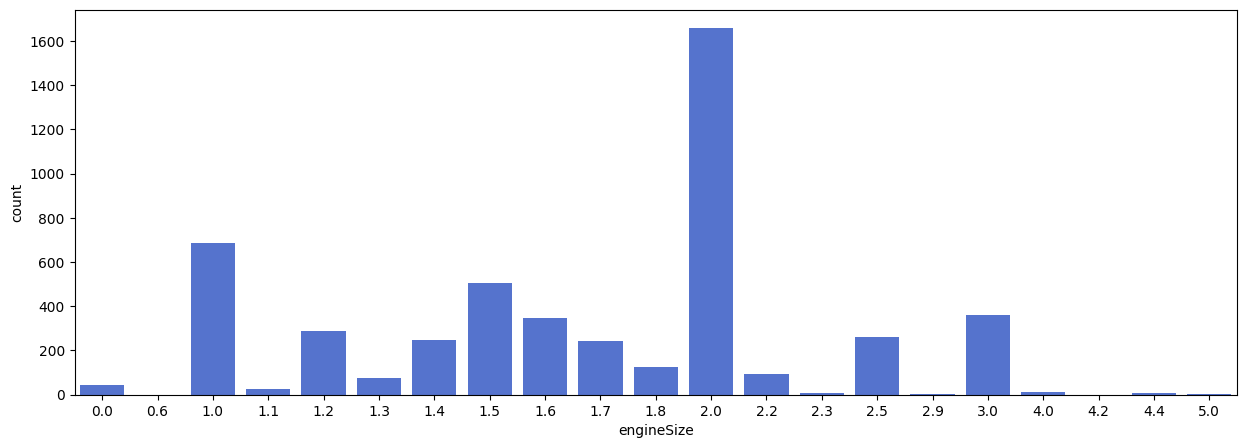

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

# Distribusi Mileage

<Axes: xlabel='mileage', ylabel='Count'>

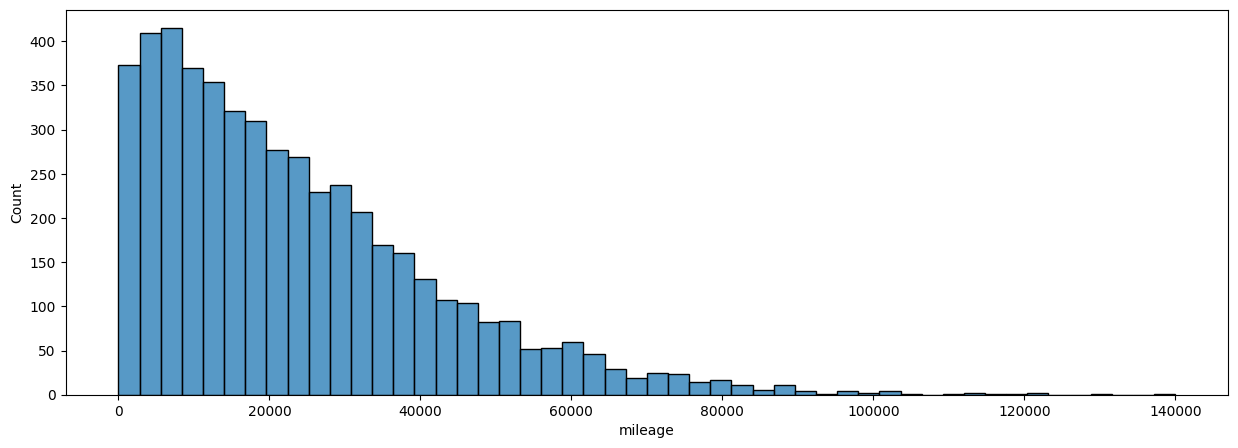

In [18]:
plt.figure(figsize=(15,5))
sns.histplot(df['mileage'])

# Distribusi Harga Mobil

<Axes: xlabel='price', ylabel='Count'>

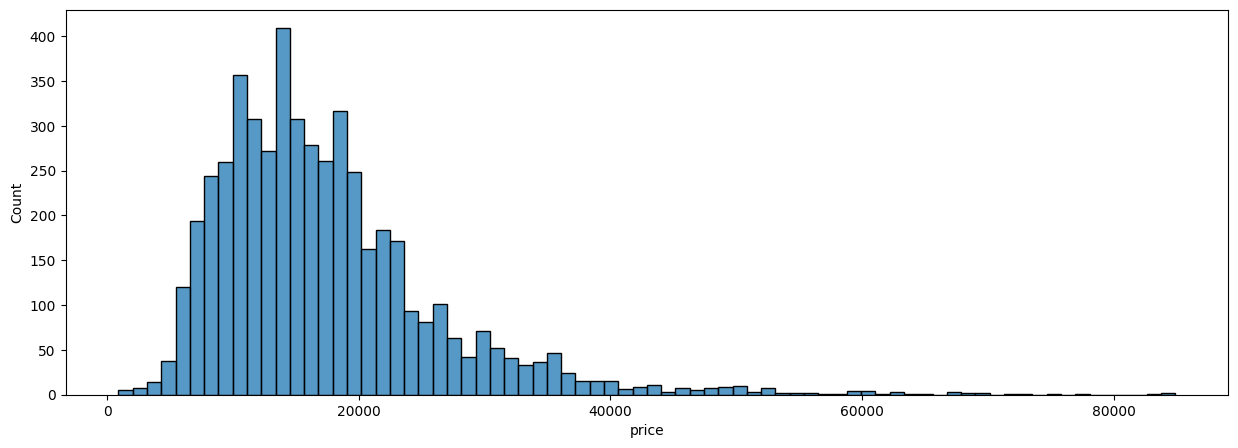

In [19]:
plt.figure(figsize=(15,5))
sns.histplot(df['price'])

# Seleksi Fitur

In [20]:
features = ['year','mileage','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((4999, 5), (4999,))

# Split Data Training Dan Data Testing

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y_train.shape, y_test.shape

((3999,), (1000,))

# Membuat Model Regresi Linier

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
y_test_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 25465294.46220354
Root Mean Squared Error (RMSE): 5046.314938864155
R-squared (R2) Score: 0.6996697703261296


# Membuat Inputan Model Regresi Linier

In [24]:
#Year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2
input_data = np.array([[2019,5000,145,30.2,2]])

prediction = lr.predict(input_data)
print('Estimasi Harga Mobil Dalam GBP :', prediction)

exchange_rate = 20800

prediction_idr = prediction * exchange_rate
print('Estimasi Harga Mobil Dalam IDR :', prediction_idr)

Estimasi Harga Mobil Dalam GBP : [25405.04469967]
Estimasi Harga Mobil Dalam IDR : [5.2842493e+08]


# Menyimpan Model

In [25]:
import pickle

filename = 'porto.sav'
pickle.dump(lr,open(filename,'wb'))